In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the path to your CSV file
csv_file_path = "log.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

df = df[df['Result'] == 'SUCCESS']

def filter_data(df, encoding, height, cities):
    if cities is not None:
        return df[(df['Encoding'] == encoding) & (df['Height'] == height) & (df['Cities'] == cities)]
    else:
        return df[(df['Encoding'] == encoding) & (df['Height'] == height) & (df['Cities'] != 2) & (df['Cities'] != 1000)]

def plot_data(ax, df, encoding_label, height, cities):
    ax.plot(df['Trains'], df['Success'], marker='o', label=encoding_label)

def setup_plot(ax, height, cities):
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=1)
    ax.set_yscale('log')
    ax.set_xlabel('Trains')
    ax.set_title(f'Success vs Trains (Height={height}, Cities={cities})')
    ax.legend()
    ax.grid(True)

     # Set x-ticks to only show points divisible by 5
    max_trains = ax.get_xlim()[1]
    ax.set_xticks(range(0, int(max_trains) + 1, 10))

# Display the first few rows of the DataFrame to confirm the data has been loaded correctly
df.head()

,Encoding,Height,Width,Cities,Trains,Result,Success,Failures,Detailed Failures,Solving Proportion,Given Horizon,Resulting Horizon
0,encodings/multiple/grid/,50,50,2,5,SUCCESS,316,5,UNSATISFIABLE:UNSATISFIABLE:UNSATISFIABLE:UNSA...,0.001979,71,49
1,encodings/multiple/grid/,50,50,2,10,SUCCESS,65,6,UNSATISFIABLE:UNSATISFIABLE:UNSATISFIABLE:UNSA...,0.003844,74,57
2,encodings/multiple/grid/,50,50,2,15,SUCCESS,30,3,UNSATISFIABLE:MEMORY:MEMORY,0.006186,74,62
3,encodings/multiple/grid/,50,50,2,20,SUCCESS,22,3,MEMORY:UNSATISFIABLE:MEMORY,0.010499,66,58
4,encodings/multiple/grid/,50,50,2,25,SUCCESS,17,1,MEMORY,0.015099,64,58


# Visualize

In [ ]:
encodings = [
    ('encodings/multiple/grid/', 'Grid Encoding'),
    ('encodings/multiple/weighted/', 'Weighted Encoding'),
    ('encodings/multiple/ordered_pipe/', 'Ordered Pipe Encoding'),
    ('encodings/multiple/path_assigning/', 'Path Assigning Encoding'),
    ('encodings/multiple/weighted_no_waiting/', 'Weighted No Waiting Encoding')
]

heights = [50, 100, 200]
cities_values = [2, None, 1000]  # None represents the middle row with other city values

# Create a figure with nine subplots (3x3 grid)
fig, axs = plt.subplots(3, 3, figsize=(24, 18))

for row, cities in enumerate(cities_values):
    for col, height in enumerate(heights):
        ax = axs[row, col]
        if cities is None:
            # Filter data for cities not equal to 2 or 1000
            df_filtered = df[(df['Cities'] != 2) & (df['Cities'] != 1000) & (df['Height'] == height)]
            for encoding, label in encodings:
                plot_data(ax, df_filtered[df_filtered['Encoding'] == encoding], label, height, 'Other')
            setup_plot(ax, height, 'Other')
        else:
            for encoding, label in encodings:
                df_filtered = filter_data(df, encoding, height, cities)
                plot_data(ax, df_filtered, label, height, cities)
            setup_plot(ax, height, cities)

axs[0, 0].set_ylabel('Solved within 20 minutes')
axs[1, 0].set_ylabel('Solved within 20 minutes')
axs[2, 0].set_ylabel('Solved within 20 minutes')

# Show the plots
plt.show()

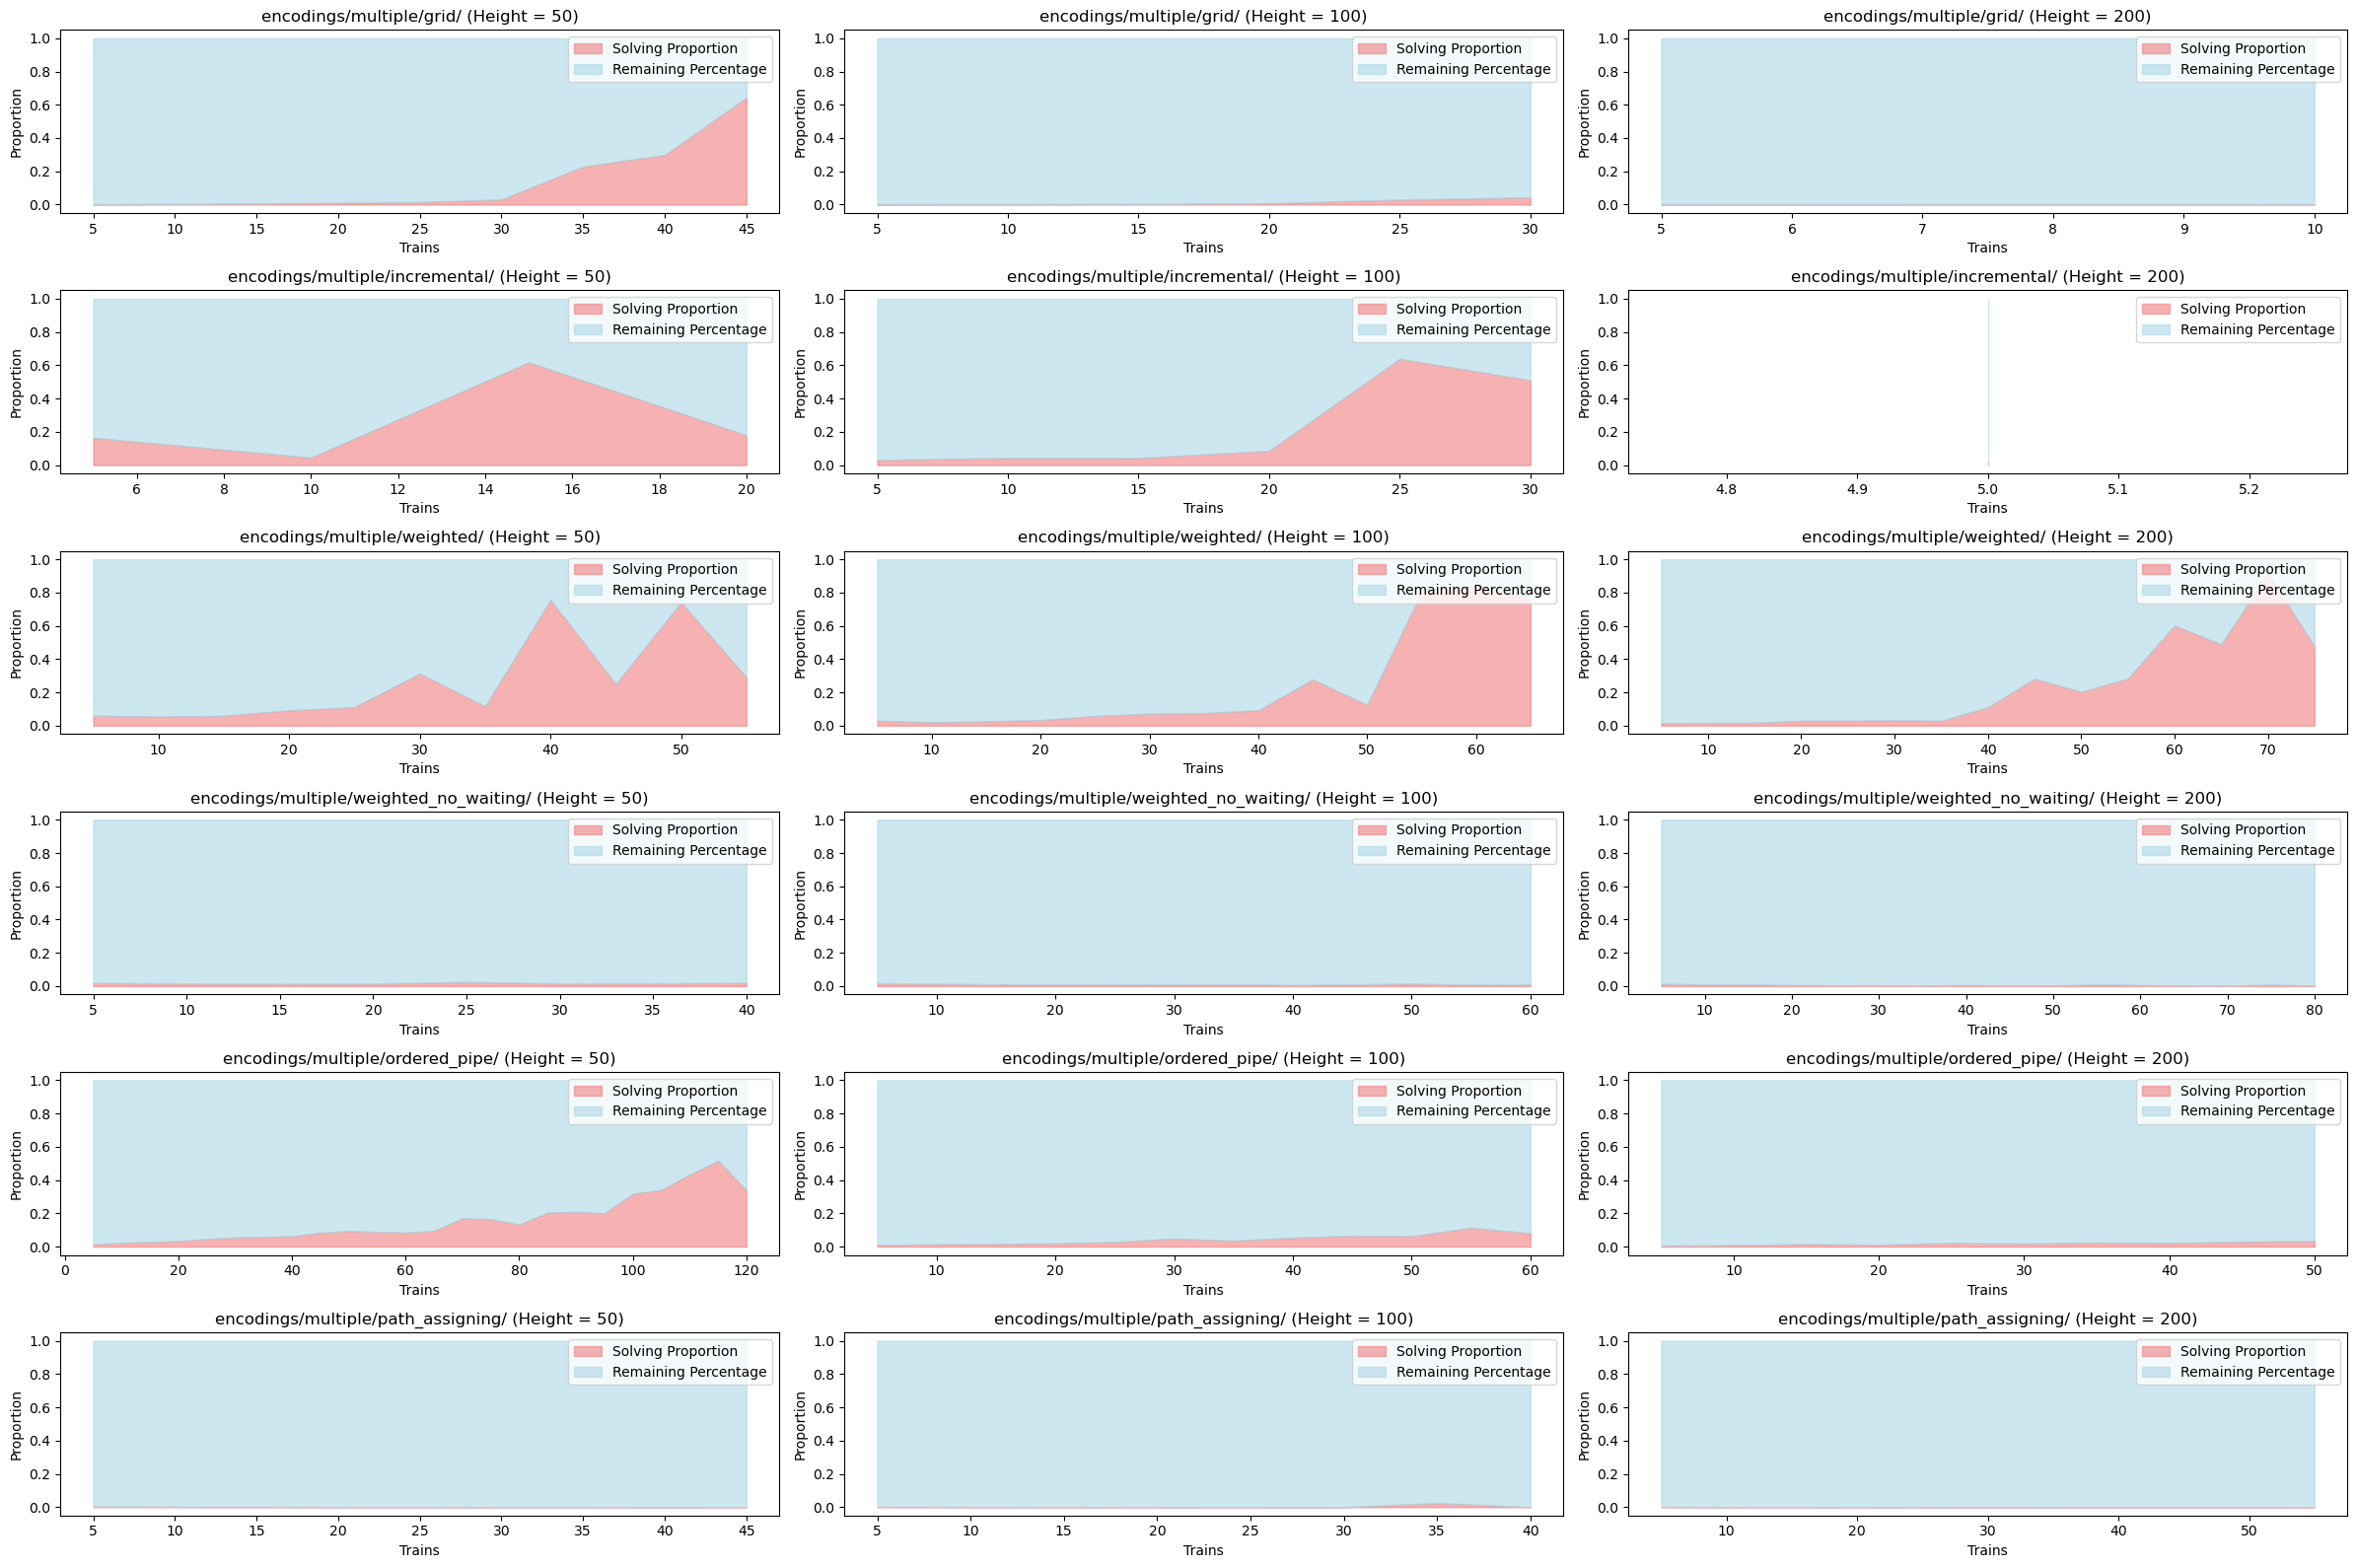

In [3]:
# Create a list of encodings and heights to iterate through
encodings = ["encodings/multiple/grid/", "encodings/multiple/incremental/", "encodings/multiple/weighted/", "encodings/multiple/weighted_no_waiting/", "encodings/multiple/ordered_pipe/", "encodings/multiple/path_assigning/"]
heights = [50, 100, 200]

# Create a figure with four rows and three columns (4 encodings x 3 heights)
fig, axs = plt.subplots(len(encodings), len(heights), figsize=(24, 16))

# Iterate through each encoding and height
for i, encoding in enumerate(encodings):
    for j, height in enumerate(heights):
        # Filter the DataFrame for the current encoding and height
        df_filtered = df[(df["Encoding"] == encoding) & (df['Height'] == height) & (df['Cities'] == 2)]
        
        # Extract the "Trains" and "Solving Proportion" columns
        trains = df_filtered["Trains"]
        solving_proportion = df_filtered["Solving Proportion"]
        remaining_percentage = 1 - solving_proportion
        
        # Plot the solving proportion and remaining percentage
        axs[i, j].fill_between(trains, solving_proportion, color='lightcoral', alpha=0.6, label='Solving Proportion')
        axs[i, j].fill_between(trains, solving_proportion, 1, color='lightblue', alpha=0.6, label='Remaining Percentage')
        axs[i, j].set_xlabel('Trains')
        axs[i, j].set_ylabel('Proportion')
        axs[i, j].set_title(f'{encoding} (Height = {height})')
        axs[i, j].legend()
        
# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Export

In [ ]:
def plot_data(ax, df, encoding_label):
    ax.plot(df['Trains'], df['Success'], marker='o', label=encoding_label)

def setup_plot(ax, title):
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=1)
    ax.set_yscale('log')
    ax.set_xlabel('Trains')
    ax.set_ylabel('Instances Solved')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)
    
    # Set x-ticks to only show points divisible by 10
    max_trains = ax.get_xlim()[1]
    ax.set_xticks(range(0, int(max_trains) + 1, 10))

encodings = [
    ('encodings/multiple/grid/', 'Grid'),
    ('encodings/multiple/incremental/', 'Incremental'),
    ('encodings/multiple/weighted/', 'Weighted'),
    ('encodings/multiple/ordered_pipe/', 'Ordered'),
    ('encodings/multiple/path_assigning/', 'Path Assigning'),
    ('encodings/multiple/weighted_no_waiting/', 'Weighted*')
]

def save_plot(df, height, cities, filename, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    for encoding, label in encodings:
        df_filtered = filter_data(df, encoding, height, cities)
        plot_data(ax, df_filtered, label)
    setup_plot(ax, title)
    plt.savefig(filename)
    plt.close(fig)

# Generate plots
save_plot(df, 200, 2, 'sparse.eps', 'Sparse')
save_plot(df, 50, 2, 'normal.eps', 'Normal')
save_plot(df, 50, None, 'dense.eps', 'Dense')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the necessary data

# Create a list of encodings and heights to iterate through
encodings = ["encodings/multiple/weighted/", "encodings/multiple/weighted_no_waiting/"]
height = 100  # Only interested in height 100

# Iterate through each encoding
for i, encoding in enumerate(encodings):
    # Filter the DataFrame for the current encoding and height
    df_filtered = df[(df["Encoding"] == encoding) & (df['Height'] == height) & (df['Cities'] == 2)]
    
    # Extract the "Trains" and "Solving Proportion" columns
    trains = df_filtered["Trains"]
    solving_proportion = df_filtered["Solving Proportion"]
    remaining_percentage = 1 - solving_proportion
    
    # Create a new figure
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size as needed
    
    # Plot the solving proportion and remaining percentage
    ax.fill_between(trains, solving_proportion, color='lightcoral', alpha=0.6, label='Solving Proportion')
    ax.fill_between(trains, solving_proportion, 1, color='lightblue', alpha=0.6, label='Remaining Percentage')
    ax.set_xlabel('Trains')
    ax.set_ylabel('Proportion')
    ax.set_title(f'{encoding} (Height = {height})')
    ax.legend()
    
    # Adjust layout and save the plot as EPS
    plt.tight_layout()
    if i == 0:
        filename = "weighted.eps"
    elif i == 1:
        filename = "weighted_reduced.eps"
    plt.savefig(filename, format='eps')
    plt.close()  # Close the current figure to release memory